# Harnessing Machine Learning for interpersonal physical alignment

In [1]:
#libraries
import numpy as np 
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

#preproccesing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report,f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#models
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
import xgboost

import warnings
warnings.filterwarnings('ignore')

# Loading the data:

In [2]:
columns = ['l_Frame ID', 'l_Hand Type',
       'l_# hands', 'l_Position X', 'l_Position Y', 'l_Position Z', 'l_Velocity X',
       'l_Velocity Y', 'l_Velocity Z', 'l_Pitch', 'l_Roll', 'l_Yaw', 'l_Wrist Pos X',
       'l_Wrist Pos Y', 'l_Wrist Pos Z', 'l_Elbow pos X', 'l_Elbow Pos Y',
       'l_Elbow Pos Z', 'l_Grab Strenth', 'l_Grab Angle', 'l_Pinch Strength',
       'type',
       'r_Frame ID', 'r_Hand Type',
       'r_# hands', 'r_Position X', 'r_Position Y', 'r_Position Z', 'r_Velocity X',
       'r_Velocity Y', 'r_Velocity Z', 'r_Pitch', 'r_Roll', 'r_Yaw', 'r_Wrist Pos X',
       'r_Wrist Pos Y', 'r_Wrist Pos Z', 'r_Elbow pos X', 'r_Elbow Pos Y',
       'r_Elbow Pos Z', 'r_Grab Strenth', 'r_Grab Angle', 'r_Pinch Strength',
       'r_type']

In [3]:
def load(name,HR):   
    h = []
    j = 0
    for i in name:
        df = pd.read_csv(i)        
        if(name[j][-5:] == 'n.csv'):
            df["type"] = 'Spontan'
        if(name[j][-5:] == 'c.csv'):
            df["type"] = 'Sync'
        if(name[j][-5:] == 'e.csv'):  
            df["type"] = 'Alone'
            df = df[df[' Hand Type'] != 'right']
            df = df.set_index(['Time'])            
            df = df.reset_index(drop=True)
            HR = HR.reset_index(drop=True)             
            f = pd.concat([df, HR], axis = 1)                
            f.columns = columns
            
        if (name[j][-5:] != 'e.csv'):
            df_l = df[df[' Hand Type']=='left']
            df_r = df[df[' Hand Type']=='right']
            df_l = df_l.set_index(['Time'])
            df_r = df_r.set_index(['Time'])            
            f = pd.concat([df_l,df_r], axis = 1)
            f.columns = columns

        j = j + 1
        h.append(f)    
    return h

### Load right hand set

In [4]:
right_alone_path = r'C:\Users\talia\OneDrive\שולחן העבודה\CS BA\שנה א\Semester B\Data Science Project B\קבצים לעבודת גמר\extraFiles/HandRight.csv'
right_alone_df = pd.read_csv(right_alone_path)
right_alone_df

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,128.2883,15478,right,1,15.671670,226.2064,20.264700,34.26665,-195.214700,-35.043020,...,-0.277800,46.88831,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0
1,128.3048,15480,right,1,16.241190,222.9389,20.117810,36.16443,-180.093900,-4.052799,...,-0.277763,47.54861,205.6568,86.42250,203.9553,47.88272,238.4482,0.0,0.243050,0.0
2,128.3218,15482,right,1,16.724610,220.9709,19.949720,26.35298,-95.088190,-11.157620,...,-0.278792,48.15030,204.5182,86.35149,204.6231,45.35921,236.8544,0.0,0.281134,0.0
3,128.3384,15484,right,1,17.090160,219.7124,19.676790,19.46804,-61.755180,-21.303780,...,-0.279768,48.64175,203.9989,86.16056,204.9939,44.18692,236.0927,0.0,0.277691,0.0
4,128.3551,15486,right,1,17.460170,219.3652,19.131280,21.94964,-8.355943,-35.081790,...,-0.278629,48.93135,203.3777,85.59017,204.5952,42.68003,235.2896,0.0,0.283008,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4807,208.1942,24687,right,1,-15.404800,208.0276,9.980799,167.86240,510.085200,-105.529500,...,-0.282299,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.503490,0.0
4808,208.2108,24689,right,1,-12.678650,218.1196,9.314082,145.00970,562.359400,-20.707010,...,-0.263492,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.403687,0.0
4809,208.2276,24691,right,1,-9.643562,228.2807,9.722980,180.42160,591.901900,28.880570,...,-0.234336,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.310940,0.0
4810,208.2443,24692,right,1,-7.980715,233.5056,10.419080,192.45930,604.734400,80.566980,...,-0.222084,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.286526,0.0


In [5]:
right_alone_df.groupby([' Hand Type']).count()

,Time,Frame ID,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
Hand Type,,,,,,,,,,,,,,,,,,,,,
left,74,74,74,74,74,74,74,74,74,74,...,74,74,74,74,74,74,74,74,74,74
right,4738,4738,4738,4738,4738,4738,4738,4738,4738,4738,...,4738,4354,4354,4354,4354,4354,4354,4738,4738,4738


In [6]:
right_alone_df = right_alone_df[right_alone_df[' Hand Type'] != 'left']
right_alone_df.groupby([' Hand Type']).count()

,Time,Frame ID,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
Hand Type,,,,,,,,,,,,,,,,,,,,,
right,4738,4738,4738,4738,4738,4738,4738,4738,4738,4738,...,4738,4354,4354,4354,4354,4354,4354,4738,4738,4738


In [7]:
right_alone_df.columns

Index(['Time', ' Frame ID', ' Hand Type', ' # hands', ' Position X',
       ' Position Y', ' Position Z', ' Velocity X', ' Velocity Y',
       ' Velocity Z', ' Pitch', ' Roll', ' Yaw', ' Wrist Pos X',
       ' Wrist Pos Y', ' Wrist Pos Z', ' Elbow pos X', ' Elbow Pos Y',
       ' Elbow Pos Z', ' Grab Strenth', ' Grab Angle', ' Pinch Strength'],
      dtype='object')

### Load test

In [8]:
ItielLab_path = r'C:\Users\talia\OneDrive\שולחן העבודה\CS BA\שנה א\Semester B\Data Science Project B\קבצים לעבודת גמר\extraFiles\Validation\Itiel Lab/'
MorSHerman_path = r'C:\Users\talia\OneDrive\שולחן העבודה\CS BA\שנה א\Semester B\Data Science Project B\קבצים לעבודת גמר\extraFiles\Validation\Mor SHerman/'
OdedMedina_path = r'C:\Users\talia\OneDrive\שולחן העבודה\CS BA\שנה א\Semester B\Data Science Project B\קבצים לעבודת גמר\extraFiles\Validation\Oded Medina/'
ItielLab = [ItielLab_path + i for i in os.listdir(ItielLab_path)]
MorSHerman = [MorSHerman_path + i for i in os.listdir(MorSHerman_path)]
OdedMedina = [OdedMedina_path + i for i in os.listdir(OdedMedina_path)]

In [9]:
Itiel = load(ItielLab,right_alone_df)
Mor = load(MorSHerman,right_alone_df)
Oded = load(OdedMedina,right_alone_df)

In [10]:
ItielResult = pd.concat(Itiel)
MorResult = pd.concat(Mor)
OdedResult = pd.concat(Oded)

In [11]:
test_csv = [ItielResult,MorResult,OdedResult]
test_df = pd.concat(test_csv)
test_df

,l_Frame ID,l_Hand Type,l_# hands,l_Position X,l_Position Y,l_Position Z,l_Velocity X,l_Velocity Y,l_Velocity Z,l_Pitch,...,r_Wrist Pos X,r_Wrist Pos Y,r_Wrist Pos Z,r_Elbow pos X,r_Elbow Pos Y,r_Elbow Pos Z,r_Grab Strenth,r_Grab Angle,r_Pinch Strength,r_type
772.2799,90321.0,left,2.0,-218.35700,305.6544,63.57877,193.24920,313.4828,-16.51894,0.480587,...,129.0877,196.6624,107.6295,351.3936,90.84698,131.1359,0.0,0.453898,0.0,Spontan
772.2964,90323.0,left,2.0,-213.44920,312.6948,62.97603,378.39140,334.7848,-62.01735,0.455288,...,127.3381,193.0091,111.5665,354.6543,98.62046,135.8045,0.0,0.495044,0.0,Spontan
772.3131,90325.0,left,2.0,-205.40890,316.8528,62.02932,653.07540,110.5462,-125.04970,0.547471,...,125.6021,190.9333,115.3645,356.3591,105.17530,139.1584,0.0,0.518979,0.0,Spontan
772.3296,90327.0,left,2.0,-198.07620,315.0475,59.80693,399.98640,-148.9720,-128.15670,0.527382,...,124.1724,188.8540,118.5423,355.9033,104.77030,138.5432,0.0,0.533946,0.0,Spontan
772.3464,90328.0,left,2.0,-195.17060,313.2556,58.88690,336.18630,-207.3303,-106.44790,0.536742,...,123.4233,187.3725,119.4489,355.2591,103.04280,137.0559,0.0,0.575149,0.0,Spontan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998.7513,66216.0,left,2.0,-98.32814,314.4973,75.12682,41.16818,115.8507,27.61459,1.611798,...,156.7337,255.0919,101.9025,341.0338,65.01146,125.5006,0.0,0.000000,0.0,Sync
998.7836,66219.0,left,2.0,-97.31071,319.5955,76.22157,31.36302,143.9610,30.50205,1.616390,...,157.5847,259.1192,102.1150,336.8353,64.01215,123.4790,0.0,0.000000,0.0,Sync
998.8158,66221.0,left,2.0,-96.74767,323.8981,76.98316,27.14988,185.6218,33.74187,1.619489,...,159.1932,263.2726,102.5311,332.9102,62.99343,121.6264,0.0,0.000000,0.0,Sync
998.8495,66224.0,left,2.0,-95.67720,329.8123,78.13316,47.37696,118.3167,24.15247,1.618042,...,163.0329,269.7217,103.0749,340.7914,72.96347,121.5707,0.0,0.024162,0.0,Sync


In [12]:
test_df.groupby(['type']).count()

,l_Frame ID,l_Hand Type,l_# hands,l_Position X,l_Position Y,l_Position Z,l_Velocity X,l_Velocity Y,l_Velocity Z,l_Pitch,...,r_Wrist Pos X,r_Wrist Pos Y,r_Wrist Pos Z,r_Elbow pos X,r_Elbow Pos Y,r_Elbow Pos Z,r_Grab Strenth,r_Grab Angle,r_Pinch Strength,r_type
type,,,,,,,,,,,,,,,,,,,,,
Alone,11249,11249,11249,11249,11249,11249,11249,11249,11249,11249,...,11249,10958,10958,10958,10958,10958,10958,11249,11249,11249
Spontan,11153,11153,11153,11153,11153,11153,11153,11153,11153,11153,...,11153,11153,11153,11153,11153,11153,11153,11153,11153,11153
Sync,11035,11035,11035,11035,11035,11035,11035,11035,11035,11035,...,11016,11016,11016,11016,11016,11016,11016,11016,11016,11016


In [13]:
test_df.groupby(['l_Hand Type','type']).count()

l_Frame ID  l_# hands  l_Position X  l_Position Y  \
l_Hand Type type                                                         
left        Alone         11249      11249         11249         11249   
            Spontan       11153      11153         11153         11153   
            Sync          11035      11035         11035         11035   

                     l_Position Z  l_Velocity X  l_Velocity Y  l_Velocity Z  \
l_Hand Type type                                                              
left        Alone           11249         11249         11249         11249   
            Spontan         11153         11153         11153         11153   
            Sync            11035         11035         11035         11035   

                     l_Pitch  l_Roll  ...  r_Wrist Pos X  r_Wrist Pos Y  \
l_Hand Type type                      ...                                 
left        Alone      11249   11249  ...          11249          10958   
            Spontan    11153   11153  ...          11153          11153   
            Sync       11035   11035  ...          11016          11016   

                     r_Wrist Pos Z  r_Elbow pos X  r_Elbow Pos Y  \
l_Hand Type type                                                   
left        Alone            10958          10958          10958   
            Spontan          11153          11153          11153   
            Sync             11016          11016          11016   

                     r_Elbow Pos Z  r_Grab Strenth  r_Grab Angle  \
l_Hand Type type                                                   
left        Alone            10958           10958         11249   
            Spontan          11153           11153         11153   
            Sync             11016           11016         11016   

                     r_Pinch Strength  r_type  
l_Hand Type type                               
left        Alone               11249   11249  
            Spontan             11153   11153  
            Sync                11016   11016  

[3 rows x 42 columns]

In [14]:
test_df.groupby(['r_Hand Type','type']).count()

,,l_Frame ID,l_Hand Type,l_# hands,l_Position X,l_Position Y,l_Position Z,l_Velocity X,l_Velocity Y,l_Velocity Z,l_Pitch,...,r_Wrist Pos X,r_Wrist Pos Y,r_Wrist Pos Z,r_Elbow pos X,r_Elbow Pos Y,r_Elbow Pos Z,r_Grab Strenth,r_Grab Angle,r_Pinch Strength,r_type
r_Hand Type,type,,,,,,,,,,,,,,,,,,,,,
15478,Alone,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
15480,Alone,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
15482,Alone,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
15484,Alone,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
15486,Alone,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24284,Alone,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,1,1,1
24286,Alone,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,1,1,1
24288,Alone,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,1,1,1


In [15]:
test_df.columns

Index(['l_Frame ID', 'l_Hand Type', 'l_# hands', 'l_Position X',
       'l_Position Y', 'l_Position Z', 'l_Velocity X', 'l_Velocity Y',
       'l_Velocity Z', 'l_Pitch', 'l_Roll', 'l_Yaw', 'l_Wrist Pos X',
       'l_Wrist Pos Y', 'l_Wrist Pos Z', 'l_Elbow pos X', 'l_Elbow Pos Y',
       'l_Elbow Pos Z', 'l_Grab Strenth', 'l_Grab Angle', 'l_Pinch Strength',
       'type', 'r_Frame ID', 'r_Hand Type', 'r_# hands', 'r_Position X',
       'r_Position Y', 'r_Position Z', 'r_Velocity X', 'r_Velocity Y',
       'r_Velocity Z', 'r_Pitch', 'r_Roll', 'r_Yaw', 'r_Wrist Pos X',
       'r_Wrist Pos Y', 'r_Wrist Pos Z', 'r_Elbow pos X', 'r_Elbow Pos Y',
       'r_Elbow Pos Z', 'r_Grab Strenth', 'r_Grab Angle', 'r_Pinch Strength',
       'r_type'],
      dtype='object')

In [16]:
test_df.drop(['l_Frame ID','l_Hand Type','l_# hands','r_type','r_Frame ID', 'r_Hand Type', 'r_# hands'],axis = 1,inplace = True)

In [17]:
test_df.columns

Index(['l_Position X', 'l_Position Y', 'l_Position Z', 'l_Velocity X',
       'l_Velocity Y', 'l_Velocity Z', 'l_Pitch', 'l_Roll', 'l_Yaw',
       'l_Wrist Pos X', 'l_Wrist Pos Y', 'l_Wrist Pos Z', 'l_Elbow pos X',
       'l_Elbow Pos Y', 'l_Elbow Pos Z', 'l_Grab Strenth', 'l_Grab Angle',
       'l_Pinch Strength', 'type', 'r_Position X', 'r_Position Y',
       'r_Position Z', 'r_Velocity X', 'r_Velocity Y', 'r_Velocity Z',
       'r_Pitch', 'r_Roll', 'r_Yaw', 'r_Wrist Pos X', 'r_Wrist Pos Y',
       'r_Wrist Pos Z', 'r_Elbow pos X', 'r_Elbow Pos Y', 'r_Elbow Pos Z',
       'r_Grab Strenth', 'r_Grab Angle', 'r_Pinch Strength'],
      dtype='object')

In [18]:
test_df

,l_Position X,l_Position Y,l_Position Z,l_Velocity X,l_Velocity Y,l_Velocity Z,l_Pitch,l_Roll,l_Yaw,l_Wrist Pos X,...,r_Yaw,r_Wrist Pos X,r_Wrist Pos Y,r_Wrist Pos Z,r_Elbow pos X,r_Elbow Pos Y,r_Elbow Pos Z,r_Grab Strenth,r_Grab Angle,r_Pinch Strength
772.2799,-218.35700,305.6544,63.57877,193.24920,313.4828,-16.51894,0.480587,1.848572,1.061162,-276.7855,...,-1.555058,129.0877,196.6624,107.6295,351.3936,90.84698,131.1359,0.0,0.453898,0.0
772.2964,-213.44920,312.6948,62.97603,378.39140,334.7848,-62.01735,0.455288,1.497975,1.071478,-273.1128,...,-1.579605,127.3381,193.0091,111.5665,354.6543,98.62046,135.8045,0.0,0.495044,0.0
772.3131,-205.40890,316.8528,62.02932,653.07540,110.5462,-125.04970,0.547471,1.081522,1.123634,-266.7606,...,-1.597150,125.6021,190.9333,115.3645,356.3591,105.17530,139.1584,0.0,0.518979,0.0
772.3296,-198.07620,315.0475,59.80693,399.98640,-148.9720,-128.15670,0.527382,0.690230,1.140220,-261.4522,...,-1.609908,124.1724,188.8540,118.5423,355.9033,104.77030,138.5432,0.0,0.533946,0.0
772.3464,-195.17060,313.2556,58.88690,336.18630,-207.3303,-106.44790,0.536742,0.563588,1.150791,-259.2695,...,-1.612697,123.4233,187.3725,119.4489,355.2591,103.04280,137.0559,0.0,0.575149,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998.7513,-98.32814,314.4973,75.12682,41.16818,115.8507,27.61459,1.611798,0.871997,1.619884,-147.8138,...,-1.447439,156.7337,255.0919,101.9025,341.0338,65.01146,125.5006,0.0,0.000000,0.0
998.7836,-97.31071,319.5955,76.22157,31.36302,143.9610,30.50205,1.616390,0.878401,1.626107,-146.5180,...,-1.447845,157.5847,259.1192,102.1150,336.8353,64.01215,123.4790,0.0,0.000000,0.0
998.8158,-96.74767,323.8981,76.98316,27.14988,185.6218,33.74187,1.619489,0.895829,1.632054,-145.1963,...,-1.436827,159.1932,263.2726,102.5311,332.9102,62.99343,121.6264,0.0,0.000000,0.0
998.8495,-95.67720,329.8123,78.13316,47.37696,118.3167,24.15247,1.618042,0.904771,1.631368,-143.7923,...,-1.418975,163.0329,269.7217,103.0749,340.7914,72.96347,121.5707,0.0,0.024162,0.0


In [19]:
test_df['type'].value_counts()

Alone      11249
Spontan    11153
Sync       11035
Name: type, dtype: int64

### Load train

In [20]:
EvyatarCohen_path = r'C:\Users\talia\OneDrive\שולחן העבודה\CS BA\שנה א\Semester B\Data Science Project B\קבצים לעבודת גמר\extraFiles\Training\Evyatar Cohen/'
NofarSocial_Nuero_path = r'C:\Users\talia\OneDrive\שולחן העבודה\CS BA\שנה א\Semester B\Data Science Project B\קבצים לעבודת גמר\extraFiles\Training\Nofar Social_Nuero/'
OriyaSocial_Nuero_path = r'C:\Users\talia\OneDrive\שולחן העבודה\CS BA\שנה א\Semester B\Data Science Project B\קבצים לעבודת גמר\extraFiles\Training\Oriya Social_Nuero/'
OryaKalmanovitz_path = r'C:\Users\talia\OneDrive\שולחן העבודה\CS BA\שנה א\Semester B\Data Science Project B\קבצים לעבודת גמר\extraFiles\Training\Orya Kalmanovitz/'
RevitalMarbel_path = r'C:\Users\talia\OneDrive\שולחן העבודה\CS BA\שנה א\Semester B\Data Science Project B\קבצים לעבודת גמר\extraFiles\Training\Revital Marbel/'
ShaharTerner_path = r'C:\Users\talia\OneDrive\שולחן העבודה\CS BA\שנה א\Semester B\Data Science Project B\קבצים לעבודת גמר\extraFiles\Training\Shahar Terner/'
ShellySocial_Nuero_path = r'C:\Users\talia\OneDrive\שולחן העבודה\CS BA\שנה א\Semester B\Data Science Project B\קבצים לעבודת גמר\extraFiles\Training\Shelly Social_Nuero/'
YaelHagai_path = r'C:\Users\talia\OneDrive\שולחן העבודה\CS BA\שנה א\Semester B\Data Science Project B\קבצים לעבודת גמר\extraFiles\Training\Yael Hagai/'
YoelRaz_path = r'C:\Users\talia\OneDrive\שולחן העבודה\CS BA\שנה א\Semester B\Data Science Project B\קבצים לעבודת גמר\extraFiles\Training\Yoel Raz/'

In [21]:
EvyatarCohen = [EvyatarCohen_path + i for i in os.listdir(EvyatarCohen_path)]
NofarSocial_Nuero = [NofarSocial_Nuero_path + i for i in os.listdir(NofarSocial_Nuero_path)]
OriyaSocial_Nuero = [OriyaSocial_Nuero_path + i for i in os.listdir(OriyaSocial_Nuero_path)]
OryaKalmanovitz = [OryaKalmanovitz_path + i for i in os.listdir(OryaKalmanovitz_path)]
RevitalMarbel = [RevitalMarbel_path + i for i in os.listdir(RevitalMarbel_path)]
ShaharTerner = [ShaharTerner_path + i for i in os.listdir(ShaharTerner_path)]
ShellySocial_Nuero = [ShellySocial_Nuero_path + i for i in os.listdir(ShellySocial_Nuero_path)]
YaelHagai = [YaelHagai_path + i for i in os.listdir(YaelHagai_path)]
YoelRaz = [YoelRaz_path + i for i in os.listdir(YoelRaz_path)]

In [22]:
Evyatar = load(EvyatarCohen,right_alone_df)
Nofar = load(NofarSocial_Nuero,right_alone_df)
Oriya = load(OriyaSocial_Nuero,right_alone_df)
OryaKa = load(OryaKalmanovitz,right_alone_df)
Revital = load(RevitalMarbel,right_alone_df)
Shahar = load(ShaharTerner,right_alone_df)
Shelly = load(ShellySocial_Nuero,right_alone_df)
Yael = load(YaelHagai,right_alone_df)
Yoel = load(YoelRaz,right_alone_df)

In [23]:
EvyatarResult = pd.concat(Evyatar)
NofarResult = pd.concat(Nofar)
OriyaResult = pd.concat(Oriya)
OryaKaResult = pd.concat(OryaKa)
RevitalResult = pd.concat(Revital)
ShaharResult = pd.concat(Shahar)
ShellyResult = pd.concat(Shelly)
YaelResult = pd.concat(Yael)
YoelResult = pd.concat(Yoel)

In [24]:
train_csv = [EvyatarResult,NofarResult,OriyaResult,OryaKaResult,RevitalResult,ShaharResult,ShellyResult,YaelResult,YoelResult]
train_df = pd.concat(train_csv)
train_df

,l_Frame ID,l_Hand Type,l_# hands,l_Position X,l_Position Y,l_Position Z,l_Velocity X,l_Velocity Y,l_Velocity Z,l_Pitch,...,r_Wrist Pos X,r_Wrist Pos Y,r_Wrist Pos Z,r_Elbow pos X,r_Elbow Pos Y,r_Elbow Pos Z,r_Grab Strenth,r_Grab Angle,r_Pinch Strength,r_type
335.9984,128556.0,left,2.0,-93.24845,143.9423,-37.815970,-109.09820,240.38980,-67.629590,0.721306,...,177.5125,173.5658,-14.56963,276.8753,-33.68264,91.61740,0.0,1.250576,0.0,Spontan
336.0150,128558.0,left,2.0,-94.86554,148.5542,-39.001580,-80.99012,278.60220,-66.793560,0.751707,...,177.7894,171.1952,-14.67785,276.0645,-33.15913,97.88171,0.0,1.069930,0.0,Spontan
336.0315,128560.0,left,2.0,-95.16259,152.5339,-39.945700,-11.37293,232.80310,-53.320790,0.783206,...,178.3730,169.9159,-15.24624,276.1767,-30.72506,104.13920,0.0,0.916969,0.0,Spontan
336.0481,128562.0,left,2.0,-95.37997,156.0973,-40.188400,-3.05615,203.81210,19.494730,0.822692,...,179.5035,168.4482,-15.56856,276.6018,-31.22840,105.96400,0.0,0.798334,0.0,Spontan
336.0651,128564.0,left,2.0,-97.10074,161.7751,-40.363380,-98.92747,316.64520,-7.328697,0.878569,...,179.5375,165.1393,-15.53189,271.5673,-37.88867,104.38140,0.0,0.728858,0.0,Spontan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856.1965,67304.0,left,2.0,-77.62601,173.7391,-14.213500,-46.75000,99.50911,71.012070,0.629213,...,129.1261,148.7041,62.82404,300.6781,-33.58672,128.75430,0.0,0.000000,0.0,Sync
856.2291,67306.0,left,2.0,-78.43058,176.0170,-12.152660,-33.69026,98.24361,59.770540,0.667618,...,129.2868,148.1146,63.11218,285.6505,-53.66640,106.02620,0.0,0.000000,0.0,Sync
856.2631,67309.0,left,2.0,-79.84506,180.2403,-9.015577,-68.45120,136.37580,87.632770,0.725945,...,131.8590,149.6264,66.09853,283.6185,-58.03491,95.29868,0.0,0.000000,0.0,Sync
856.2958,67311.0,left,2.0,-81.57359,183.5054,-7.185198,-63.24731,121.75270,62.959700,0.762549,...,134.0416,151.5924,68.17693,288.9688,-54.13820,94.23959,0.0,0.000000,0.0,Sync


In [25]:
train_df.groupby('type').count()

,l_Frame ID,l_Hand Type,l_# hands,l_Position X,l_Position Y,l_Position Z,l_Velocity X,l_Velocity Y,l_Velocity Z,l_Pitch,...,r_Wrist Pos X,r_Wrist Pos Y,r_Wrist Pos Z,r_Elbow pos X,r_Elbow Pos Y,r_Elbow Pos Z,r_Grab Strenth,r_Grab Angle,r_Pinch Strength,r_type
type,,,,,,,,,,,,,,,,,,,,,
Alone,37663,37663,37663,37663,37663,37663,37663,37663,37663,37663,...,37663,36669,36669,36669,36669,36669,36669,37663,37663,37663
Spontan,38015,38015,38015,38015,38015,38015,38015,38015,38015,38015,...,37655,37655,37655,37655,37655,37655,37655,37655,37655,37655
Sync,37654,37654,37654,37654,37654,37654,37654,37654,37654,37654,...,37639,37639,37639,37639,37639,37639,37639,37639,37639,37639


In [26]:
train_df.columns

Index(['l_Frame ID', 'l_Hand Type', 'l_# hands', 'l_Position X',
       'l_Position Y', 'l_Position Z', 'l_Velocity X', 'l_Velocity Y',
       'l_Velocity Z', 'l_Pitch', 'l_Roll', 'l_Yaw', 'l_Wrist Pos X',
       'l_Wrist Pos Y', 'l_Wrist Pos Z', 'l_Elbow pos X', 'l_Elbow Pos Y',
       'l_Elbow Pos Z', 'l_Grab Strenth', 'l_Grab Angle', 'l_Pinch Strength',
       'type', 'r_Frame ID', 'r_Hand Type', 'r_# hands', 'r_Position X',
       'r_Position Y', 'r_Position Z', 'r_Velocity X', 'r_Velocity Y',
       'r_Velocity Z', 'r_Pitch', 'r_Roll', 'r_Yaw', 'r_Wrist Pos X',
       'r_Wrist Pos Y', 'r_Wrist Pos Z', 'r_Elbow pos X', 'r_Elbow Pos Y',
       'r_Elbow Pos Z', 'r_Grab Strenth', 'r_Grab Angle', 'r_Pinch Strength',
       'r_type'],
      dtype='object')

In [27]:
train_df.drop(['l_Frame ID','l_Hand Type','l_# hands','r_type','r_Frame ID', 'r_Hand Type', 'r_# hands'],axis = 1,inplace = True)

In [28]:
train_df.columns

Index(['l_Position X', 'l_Position Y', 'l_Position Z', 'l_Velocity X',
       'l_Velocity Y', 'l_Velocity Z', 'l_Pitch', 'l_Roll', 'l_Yaw',
       'l_Wrist Pos X', 'l_Wrist Pos Y', 'l_Wrist Pos Z', 'l_Elbow pos X',
       'l_Elbow Pos Y', 'l_Elbow Pos Z', 'l_Grab Strenth', 'l_Grab Angle',
       'l_Pinch Strength', 'type', 'r_Position X', 'r_Position Y',
       'r_Position Z', 'r_Velocity X', 'r_Velocity Y', 'r_Velocity Z',
       'r_Pitch', 'r_Roll', 'r_Yaw', 'r_Wrist Pos X', 'r_Wrist Pos Y',
       'r_Wrist Pos Z', 'r_Elbow pos X', 'r_Elbow Pos Y', 'r_Elbow Pos Z',
       'r_Grab Strenth', 'r_Grab Angle', 'r_Pinch Strength'],
      dtype='object')

In [29]:
train_df

,l_Position X,l_Position Y,l_Position Z,l_Velocity X,l_Velocity Y,l_Velocity Z,l_Pitch,l_Roll,l_Yaw,l_Wrist Pos X,...,r_Yaw,r_Wrist Pos X,r_Wrist Pos Y,r_Wrist Pos Z,r_Elbow pos X,r_Elbow Pos Y,r_Elbow Pos Z,r_Grab Strenth,r_Grab Angle,r_Pinch Strength
335.9984,-93.24845,143.9423,-37.815970,-109.09820,240.38980,-67.629590,0.721306,0.570446,0.873458,-147.0455,...,-1.588251,177.5125,173.5658,-14.56963,276.8753,-33.68264,91.61740,0.0,1.250576,0.0
336.0150,-94.86554,148.5542,-39.001580,-80.99012,278.60220,-66.793560,0.751707,0.578096,0.879703,-148.2022,...,-1.528183,177.7894,171.1952,-14.67785,276.0645,-33.15913,97.88171,0.0,1.069930,0.0
336.0315,-95.16259,152.5339,-39.945700,-11.37293,232.80310,-53.320790,0.783206,0.582112,0.895820,-148.3343,...,-1.461710,178.3730,169.9159,-15.24624,276.1767,-30.72506,104.13920,0.0,0.916969,0.0
336.0481,-95.37997,156.0973,-40.188400,-3.05615,203.81210,19.494730,0.822692,0.582675,0.918827,-148.3562,...,-1.380241,179.5035,168.4482,-15.56856,276.6018,-31.22840,105.96400,0.0,0.798334,0.0
336.0651,-97.10074,161.7751,-40.363380,-98.92747,316.64520,-7.328697,0.878569,0.614319,0.946004,-149.2292,...,-1.287442,179.5375,165.1393,-15.53189,271.5673,-37.88867,104.38140,0.0,0.728858,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856.1965,-77.62601,173.7391,-14.213500,-46.75000,99.50911,71.012070,0.629213,1.887313,0.429763,-107.8500,...,-0.495629,129.1261,148.7041,62.82404,300.6781,-33.58672,128.75430,0.0,0.000000,0.0
856.2291,-78.43058,176.0170,-12.152660,-33.69026,98.24361,59.770540,0.667618,1.870251,0.434664,-108.0805,...,-0.525644,129.2868,148.1146,63.11218,285.6505,-53.66640,106.02620,0.0,0.000000,0.0
856.2631,-79.84506,180.2403,-9.015577,-68.45120,136.37580,87.632770,0.725945,1.838532,0.456099,-109.0018,...,-0.574317,131.8590,149.6264,66.09853,283.6185,-58.03491,95.29868,0.0,0.000000,0.0
856.2958,-81.57359,183.5054,-7.185198,-63.24731,121.75270,62.959700,0.762549,1.824587,0.459446,-109.7250,...,-0.612753,134.0416,151.5924,68.17693,288.9688,-54.13820,94.23959,0.0,0.000000,0.0


In [30]:
train_df.groupby('type').count()

,l_Position X,l_Position Y,l_Position Z,l_Velocity X,l_Velocity Y,l_Velocity Z,l_Pitch,l_Roll,l_Yaw,l_Wrist Pos X,...,r_Yaw,r_Wrist Pos X,r_Wrist Pos Y,r_Wrist Pos Z,r_Elbow pos X,r_Elbow Pos Y,r_Elbow Pos Z,r_Grab Strenth,r_Grab Angle,r_Pinch Strength
type,,,,,,,,,,,,,,,,,,,,,
Alone,37663,37663,37663,37663,37663,37663,37663,37663,37663,37663,...,37663,37663,36669,36669,36669,36669,36669,36669,37663,37663
Spontan,38015,38015,38015,38015,38015,38015,38015,38015,38015,38015,...,37655,37655,37655,37655,37655,37655,37655,37655,37655,37655
Sync,37654,37654,37654,37654,37654,37654,37654,37654,37654,37654,...,37639,37639,37639,37639,37639,37639,37639,37639,37639,37639


In [31]:
print("Number of missing values in the test set:",test_df.isnull().any().sum())

Number of missing values in the test set: 37


In [32]:
test_df.dropna(inplace=True, axis=0, how="any")

In [33]:

print("Number of missing values in the train set:",train_df.isnull().any().sum())

Number of missing values in the train set: 37


In [34]:
train_df.dropna(inplace=True, axis=0, how="any")

In [35]:
train_df.groupby('type').count()

,l_Position X,l_Position Y,l_Position Z,l_Velocity X,l_Velocity Y,l_Velocity Z,l_Pitch,l_Roll,l_Yaw,l_Wrist Pos X,...,r_Yaw,r_Wrist Pos X,r_Wrist Pos Y,r_Wrist Pos Z,r_Elbow pos X,r_Elbow Pos Y,r_Elbow Pos Z,r_Grab Strenth,r_Grab Angle,r_Pinch Strength
type,,,,,,,,,,,,,,,,,,,,,
Alone,36669,36669,36669,36669,36669,36669,36669,36669,36669,36669,...,36669,36669,36669,36669,36669,36669,36669,36669,36669,36669
Spontan,37655,37655,37655,37655,37655,37655,37655,37655,37655,37655,...,37655,37655,37655,37655,37655,37655,37655,37655,37655,37655
Sync,37639,37639,37639,37639,37639,37639,37639,37639,37639,37639,...,37639,37639,37639,37639,37639,37639,37639,37639,37639,37639


In [36]:
train_df['type'].value_counts()

Spontan    37655
Sync       37639
Alone      36669
Name: type, dtype: int64

# preprocessing of data

In [37]:
# keep aside to the end
test_labels = test_df['type']
X_test = test_df.drop('type', axis =1)

In [38]:
# train the model on this data
train_label = train_df['type']
train = train_df.drop('type', axis =1)
X_train, X_valid, y_train, y_valid = train_test_split(train, train_label, test_size=0.2, random_state=1)

In [39]:
# Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

# Modeling:

### Dummy model

In [40]:
dc = DummyClassifier(strategy = 'most_frequent')
dc.fit(X_train, y_train)
y_pred = dc.predict(X_valid)
label, count = np.unique(np.array(y_pred), return_counts=True)
print("Accuracy of Dummy Classifier: ",metrics.accuracy_score(y_valid, y_pred)*100)

Accuracy of Dummy Classifier:  33.389898629035855


### KNN 

In [41]:
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_valid)

In [42]:
#f-score:
f=f1_score(y_valid, knn_pred,average='weighted')
print('f-score', f)

f-score 0.9915149888091086


In [43]:
#Accuracy:
print("Testing Score: ",knn.score(X_valid,y_valid)*100)
print("Training Score: ",knn.score(X_train, y_train)*100)

Testing Score:  99.1515205644621
Training Score:  99.31561906888467


In [44]:
#Confusion matrix:
df = pd.DataFrame(
    metrics.confusion_matrix(y_valid,knn_pred),
    index = [['actual', 'actual','actual'], ['Alone', 'Spontan' ,'Sync']],
    columns = [['predicted', 'predicted','predicted'], ['Alone' ,'Spontan', 'Sync']])
df

predicted              
                   Alone Spontan  Sync
actual Alone        7360       0     0
       Spontan         0    7453   103
       Sync            1      86  7390

              precision    recall  f1-score   support

       Alone       1.00      1.00      1.00      7360
     Spontan       0.99      0.99      0.99      7556
        Sync       0.99      0.99      0.99      7477

    accuracy                           0.99     22393
   macro avg       0.99      0.99      0.99     22393
weighted avg       0.99      0.99      0.99     22393



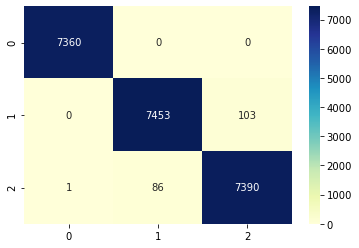

In [45]:
con_mat = confusion_matrix(y_valid, knn_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g',cmap="YlGnBu")
print(classification_report(y_valid, knn_pred))

### Logistic Regression

In [46]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_valid)

In [47]:
#f-score:
f=f1_score(y_valid, lr_pred,average='weighted')
print('f-score', f)

f-score 0.8901789924360403


In [48]:
#Accuracy:
print("Testing Score: ",lr.score(X_valid,y_valid)*100)
print("Training Score: ",lr.score(X_train, y_train)*100)

Testing Score:  89.03228687536283
Training Score:  88.91034944735961


In [49]:
#Confusion matrix:
df = pd.DataFrame(
    metrics.confusion_matrix(y_valid,lr_pred),
    index = [['actual', 'actual','actual'], ['Alone', 'Spontan' ,'Sync']],
    columns = [['predicted', 'predicted','predicted'], ['Alone' ,'Spontan', 'Sync']])
df

predicted              
                   Alone Spontan  Sync
actual Alone        7360       0     0
       Spontan         0    6581   975
       Sync            0    1481  5996

              precision    recall  f1-score   support

       Alone       1.00      1.00      1.00      7360
     Spontan       0.82      0.87      0.84      7556
        Sync       0.86      0.80      0.83      7477

    accuracy                           0.89     22393
   macro avg       0.89      0.89      0.89     22393
weighted avg       0.89      0.89      0.89     22393



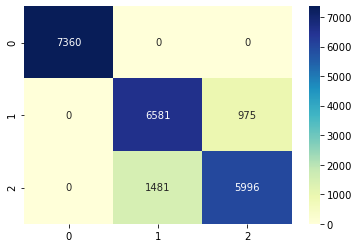

In [50]:
con_mat = confusion_matrix(y_valid, lr_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g',cmap="YlGnBu")
print(classification_report(y_valid, lr_pred))

### Gaussian Naive Bayes 

In [51]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_valid)

In [52]:
#f-score:
f=f1_score(y_valid, gnb_pred,average='weighted')
print('f-score', f)

f-score 0.8541855838186355


In [53]:
#Accuracy:
print("Testing Score: ",gnb.score(X_valid,y_valid)*100)
print("Training Score: ",gnb.score(X_train, y_train)*100)

Testing Score:  85.42401643370697
Training Score:  85.61237021324104


In [54]:
#Confusion matrix:
df = pd.DataFrame(
    metrics.confusion_matrix(y_valid,gnb_pred),
    index = [['actual', 'actual','actual'], ['Alone', 'Spontan' ,'Sync']],
    columns = [['predicted', 'predicted','predicted'], ['Alone' ,'Spontan', 'Sync']])
df

predicted              
                   Alone Spontan  Sync
actual Alone        7360       0     0
       Spontan         0    6051  1505
       Sync            0    1759  5718

              precision    recall  f1-score   support

       Alone       1.00      1.00      1.00      7360
     Spontan       0.82      0.87      0.84      7556
        Sync       0.86      0.80      0.83      7477

    accuracy                           0.89     22393
   macro avg       0.89      0.89      0.89     22393
weighted avg       0.89      0.89      0.89     22393



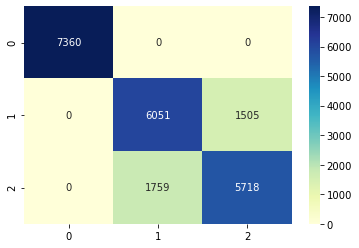

In [55]:
con_mat = confusion_matrix(y_valid, gnb_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g',cmap="YlGnBu")
print(classification_report(y_valid, lr_pred))

### Decision Tree

In [56]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_valid)

In [57]:
#f-score:
f=f1_score(y_valid, dtc_pred,average='weighted')
print('f-score', f)

f-score 0.9877640496467741


In [58]:
#Accuracy:
print("Testing Score: ",dtc.score(X_valid,y_valid))
print("Training Score: ",dtc.score(X_train, y_train))

Testing Score:  0.9877640334032957
Training Score:  1.0


In [59]:
#Confusion matrix:
df = pd.DataFrame(
    metrics.confusion_matrix(y_valid,dtc_pred),
    index = [['actual', 'actual','actual'], ['Alone', 'Spontan' ,'Sync']],
    columns = [['predicted', 'predicted','predicted'], ['Alone' ,'Spontan', 'Sync']])
df

predicted              
                   Alone Spontan  Sync
actual Alone        7360       0     0
       Spontan         0    7417   139
       Sync            0     135  7342

              precision    recall  f1-score   support

       Alone       1.00      1.00      1.00      7360
     Spontan       0.98      0.98      0.98      7556
        Sync       0.98      0.98      0.98      7477

    accuracy                           0.99     22393
   macro avg       0.99      0.99      0.99     22393
weighted avg       0.99      0.99      0.99     22393



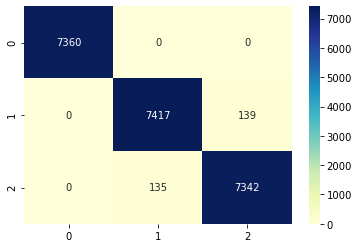

In [60]:
con_mat = confusion_matrix(y_valid, dtc_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g',cmap="YlGnBu")
print(classification_report(y_valid, dtc_pred))

### Random Forest

In [61]:
rfc = RandomForestClassifier(n_estimators = 200,random_state = 42)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_valid)

In [62]:
#f-score:
f=f1_score(y_valid, rfc_pred,average='weighted')
print('f-score', f)

f-score 0.9995087737550574


In [63]:
#Accuracy:
print("Testing Score: ",rfc.score(X_valid,y_valid))
print("Training Score: ",rfc.score(X_train, y_train))

Testing Score:  0.999508775063636
Training Score:  1.0


In [64]:
#Confusion matrix:
df = pd.DataFrame(
    metrics.confusion_matrix(y_valid,rfc_pred),
    index = [['actual', 'actual','actual'], ['Alone', 'Spontan' ,'Sync']],
    columns = [['predicted', 'predicted','predicted'], ['Alone' ,'Spontan', 'Sync']])
df

predicted              
                   Alone Spontan  Sync
actual Alone        7360       0     0
       Spontan         0    7554     2
       Sync            0       9  7468

              precision    recall  f1-score   support

       Alone       1.00      1.00      1.00      7360
     Spontan       1.00      1.00      1.00      7556
        Sync       1.00      1.00      1.00      7477

    accuracy                           1.00     22393
   macro avg       1.00      1.00      1.00     22393
weighted avg       1.00      1.00      1.00     22393



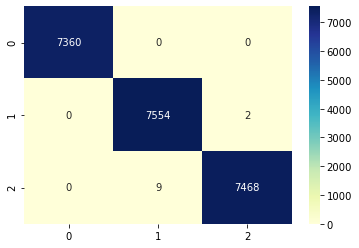

In [65]:
con_mat = confusion_matrix(y_valid, rfc_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g',cmap="YlGnBu")
print(classification_report(y_valid, rfc_pred))

# Ensemble Learning

### AdaBoost

In [66]:
n_estimators=[150,200,250,300]
learning_rate=[0.3,0.5,0.7,0.9]
scores = []
for n in n_estimators:
    for lr in learning_rate:
        adab = AdaBoostClassifier(n_estimators=n,learning_rate=lr,random_state=42)
        adab.fit(X_train, y_train)
        y_pred = adab.predict(X_valid)
        score=[n,lr,metrics.accuracy_score(y_valid, y_pred)]
        scores.append(score)
df = pd.DataFrame(scores, columns=['n estimators','learning rate','accuracy'])
df=df.sort_values('accuracy')
df

,n estimators,learning rate,accuracy
9,250,0.5,0.662618
13,300,0.5,0.662618
5,200,0.5,0.662796
1,150,0.5,0.662886
0,150,0.3,0.662930
4,200,0.3,0.662930
8,250,0.3,0.662930
12,300,0.3,0.662930
3,150,0.9,0.663913
15,300,0.9,0.663913


In [67]:
adab = AdaBoostClassifier(n_estimators = 250,learning_rate = 0.7,random_state = 42)
adab.fit(X_train, y_train)
adab_pred = adab.predict(X_valid)

In [68]:
#f-score:
f=f1_score(y_valid, adab_pred,average='weighted')
print('f-score', f)

f-score 0.6031409803643918


In [69]:
#Accuracy:
print("Testing Score: ",adab.score(X_valid,y_valid))
print("Training Score: ",adab.score(X_train, y_train))

Testing Score:  0.6802572232394052
Training Score:  0.681768449257564


In [70]:
#Confusion matrix:
df = pd.DataFrame(
    metrics.confusion_matrix(y_valid,adab_pred),
    index = [['actual', 'actual','actual'], ['Alone', 'Spontan' ,'Sync']],
    columns = [['predicted', 'predicted','predicted'], ['Alone' ,'Spontan', 'Sync']])
df

predicted              
                   Alone Spontan  Sync
actual Alone        7360       0     0
       Spontan         0     639  6917
       Sync            0     243  7234

              precision    recall  f1-score   support

       Alone       1.00      1.00      1.00      7360
     Spontan       0.72      0.08      0.15      7556
        Sync       0.51      0.97      0.67      7477

    accuracy                           0.68     22393
   macro avg       0.75      0.68      0.61     22393
weighted avg       0.74      0.68      0.60     22393



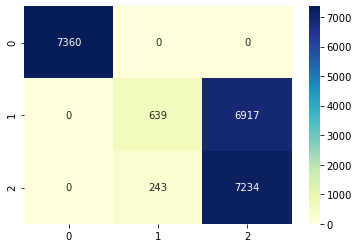

In [71]:
con_mat = confusion_matrix(y_valid, adab_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g',cmap="YlGnBu")
print(classification_report(y_valid, adab_pred))

### XGBoost

In [72]:
xgb_c = xgboost.XGBClassifier(n_estimators = 200,n_jobs = -1,learning_rate = 0.7, seed = 0,eval_metric='mlogloss')
xgb_c.fit(X_train, y_train)
xgb_c_pred = xgb_c.predict(X_valid)

In [73]:
#f-score:
f=f1_score(y_valid, xgb_c_pred,average='weighted')
print('f-score', f)

f-score 0.9997320594813163


In [74]:
#Accuracy:
print("Testing Score: ",xgb_c.score(X_valid,y_valid))
print("Training Score: ",xgb_c.score(X_train, y_train))

Testing Score:  0.9997320591256196
Training Score:  1.0


In [75]:
#Confusion matrix:
df = pd.DataFrame(
    metrics.confusion_matrix(y_valid,xgb_c_pred),
    index = [['actual', 'actual','actual'], ['Alone', 'Spontan' ,'Sync']],
    columns = [['predicted', 'predicted','predicted'], ['Alone' ,'Spontan', 'Sync']])
df

predicted              
                   Alone Spontan  Sync
actual Alone        7360       0     0
       Spontan         0    7551     5
       Sync            0       1  7476

              precision    recall  f1-score   support

       Alone       1.00      1.00      1.00      7360
     Spontan       1.00      1.00      1.00      7556
        Sync       1.00      1.00      1.00      7477

    accuracy                           1.00     22393
   macro avg       1.00      1.00      1.00     22393
weighted avg       1.00      1.00      1.00     22393



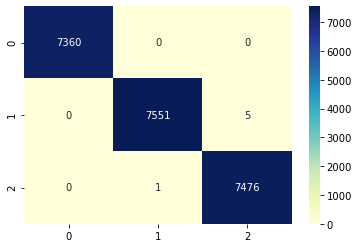

In [76]:
con_mat = confusion_matrix(y_valid, xgb_c_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g',cmap="YlGnBu")
print(classification_report(y_valid, xgb_c_pred))

# PCA:

In [131]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)

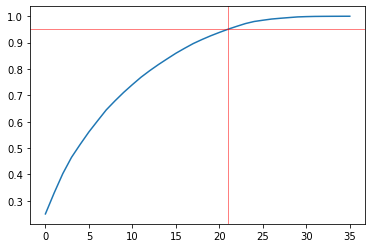

In [132]:
plt.plot(cumsum)
plt.axhline(y = 0.95, linewidth=0.5, color='r');
plt.axvline(x = 21, linewidth=0.5, color='r');

In [133]:
pca = PCA(n_components = 0.95)
X_train_reduced = pca.fit_transform(X_train)
X_valid_reduced = pca.transform(X_valid)

In [134]:
pca.n_components_

22

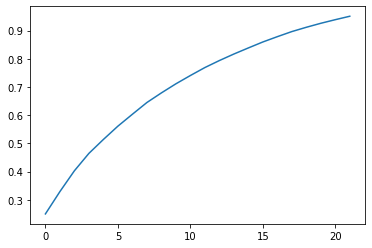

In [135]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)

In [136]:
X_train_PCA = pd.DataFrame(X_train_reduced)
X_valid_PCA = pd.DataFrame(X_valid_reduced)

## Modeling (after PCA):

### KNN 

In [83]:
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train_PCA, y_train)
knn_predPCA = knn.predict(X_valid_PCA)

In [84]:
#f-score:
f=f1_score(y_valid, knn_predPCA,average='weighted')
print('f-score', f)

f-score 0.9882995081150487


In [85]:
#Accuracy:
print("Testing Score: ",knn.score(X_valid_PCA,y_valid)*100)
print("Training Score: ",knn.score(X_train_PCA, y_train)*100)

Testing Score:  98.82999151520563
Training Score:  99.09233002121246


In [86]:
#Confusion matrix:
df = pd.DataFrame(
    metrics.confusion_matrix(y_valid,knn_predPCA),
    index = [['actual', 'actual','actual'], ['Alone', 'Spontan' ,'Sync']],
    columns = [['predicted', 'predicted','predicted'], ['Alone' ,'Spontan', 'Sync']])
df

predicted              
                   Alone Spontan  Sync
actual Alone        7360       0     0
       Spontan         0    7427   129
       Sync            1     132  7344

              precision    recall  f1-score   support

       Alone       1.00      1.00      1.00      7360
     Spontan       0.98      0.98      0.98      7556
        Sync       0.98      0.98      0.98      7477

    accuracy                           0.99     22393
   macro avg       0.99      0.99      0.99     22393
weighted avg       0.99      0.99      0.99     22393



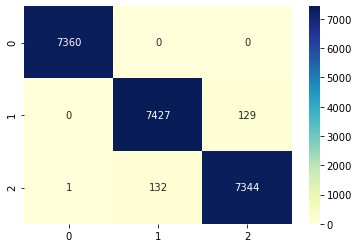

In [87]:
con_mat = confusion_matrix(y_valid, knn_predPCA)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g',cmap="YlGnBu")
print(classification_report(y_valid, knn_predPCA))

### Random Forest

In [138]:
rfcPCA = RandomForestClassifier(n_estimators = 200,random_state = 42)
rfcPCA.fit(X_train_PCA,y_train)
rfcPCA_pred = rfcPCA.predict(X_valid_PCA)

In [139]:
#f-score:
f=f1_score(y_valid, rfcPCA_pred,average='weighted')
print('f-score', f)

f-score 0.994596271031851


In [141]:
#Accuracy:
print("Testing Score: ",rfcPCA.score(X_valid_PCA,y_valid))
print("Training Score: ",rfcPCA.score(X_train_PCA, y_train))

Testing Score:  0.9945965256999956
Training Score:  1.0


In [142]:
#Confusion matrix:
df = pd.DataFrame(
    metrics.confusion_matrix(y_valid,rfcPCA_pred),
    index = [['actual', 'actual','actual'], ['Alone', 'Spontan' ,'Sync']],
    columns = [['predicted', 'predicted','predicted'], ['Alone' ,'Spontan', 'Sync']])
df

predicted              
                   Alone Spontan  Sync
actual Alone        7360       0     0
       Spontan         0    7531    25
       Sync            0      96  7381

              precision    recall  f1-score   support

       Alone       1.00      1.00      1.00      7360
     Spontan       0.99      1.00      0.99      7556
        Sync       1.00      0.99      0.99      7477

    accuracy                           0.99     22393
   macro avg       0.99      0.99      0.99     22393
weighted avg       0.99      0.99      0.99     22393



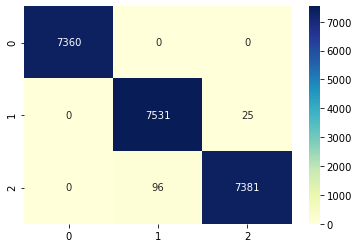

In [143]:
con_mat = confusion_matrix(y_valid, rfcPCA_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g',cmap="YlGnBu")
print(classification_report(y_valid, rfcPCA_pred))